# Visualizing Time Series Data

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/starbucks.csv", index_col=0, parse_dates=True)

In [3]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## Simple Plot

In [5]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<AxesSubplot:xlabel='Date'>

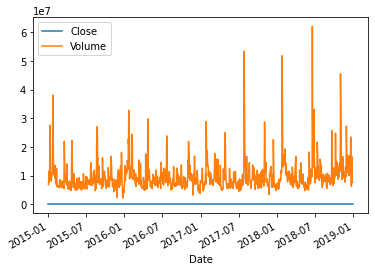

In [6]:
df.plot()

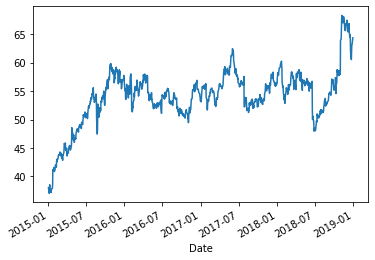

In [7]:
df["Close"].plot();

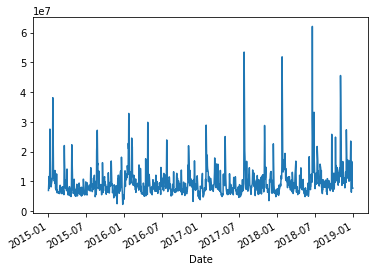

In [8]:
df["Volume"].plot();

## Plot Formatting

In [10]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing'

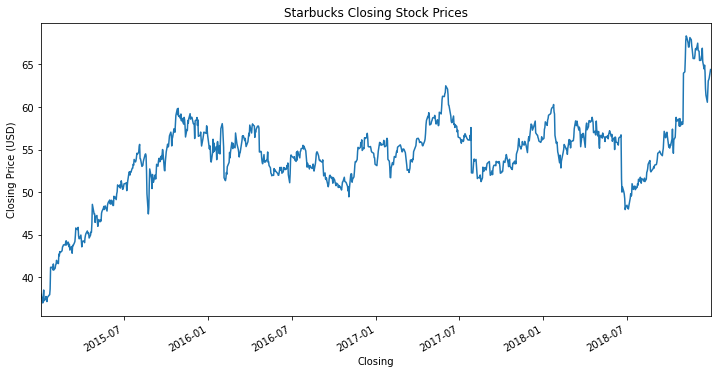

In [11]:
ax = df["Close"].plot(figsize=(12,6), title=title)
ax.autoscale(axis="x", tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Limits

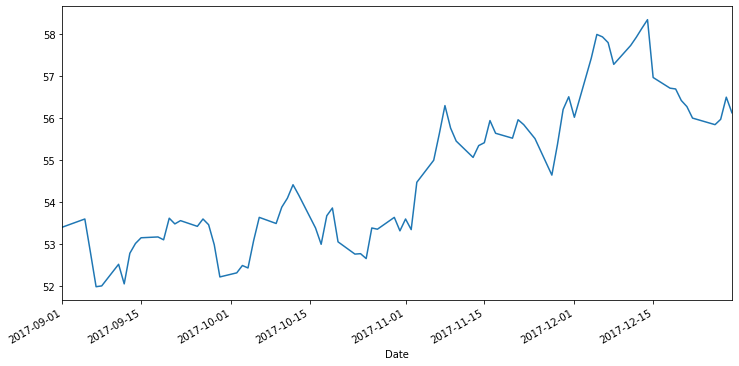

In [14]:
df["Close"]["2017-09-01":"2017-12-31"].plot(figsize=(12,6)).autoscale(axis="x", tight=True)

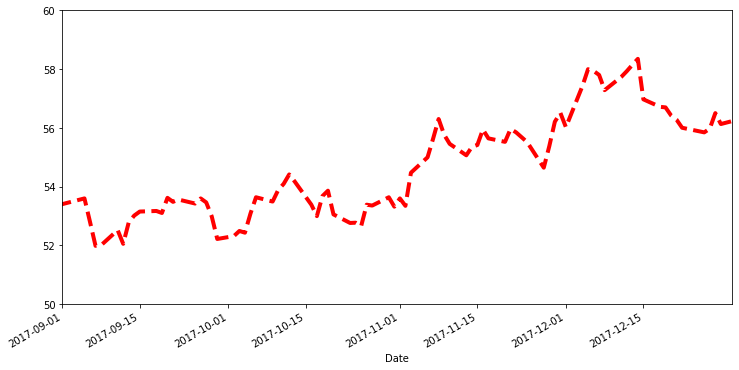

In [23]:
df["Close"].plot(figsize=(12,6), xlim=["2017-09-01","2017-12-31"],
 ylim=[50,60], ls="--", c="red",lw=4);

In [17]:
df.loc["2017-09-01":"2017-12-31"]["Close"].min()

51.9831

In [18]:
df.loc["2017-09-01":"2017-12-31"]["Close"].max()

58.3474

### Ticks

In [24]:
from matplotlib import dates

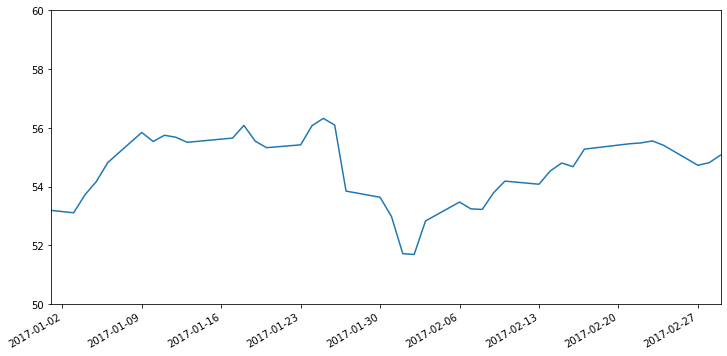

In [30]:
ax = df["Close"].plot(figsize=(12,6), xlim=['2017-01-01','2017-03-01'], ylim=[50,60])

ax.set(xlabel="")

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [31]:
from datetime import datetime

In [32]:
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

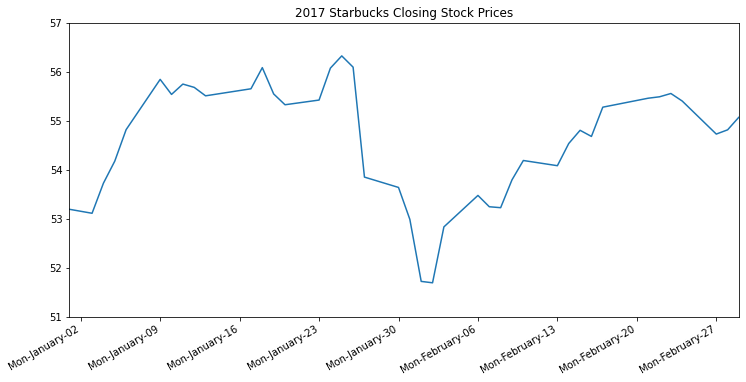

In [34]:
ax = df["Close"].plot(figsize=(12,6),xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')

ax.set(xlabel="")

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

### Major vs. Minor Axis Values

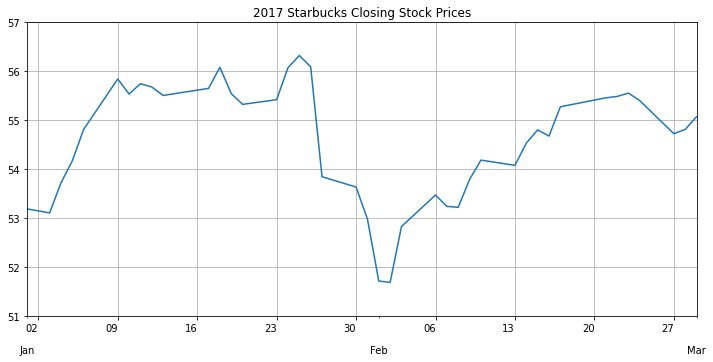

In [38]:
ax = df['Close'].plot(figsize=(12,6), xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

ax.yaxis.grid(True)
ax.xaxis.grid(True)